In [1]:
import pandas as pd
import numpy as np

# reading dataset

In [2]:
df = pd.read_csv("apple.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

# preprocessing----------------------

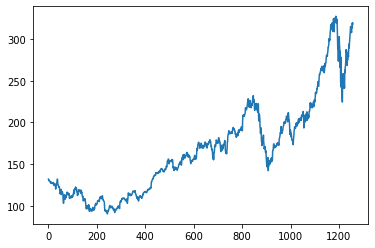

In [5]:
import matplotlib.pyplot as plt
plt.plot(df['close'])

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(df['close']).reshape(-1,1))

In [7]:
data.shape, data[:5], data[5:10]

((1258, 1),
 array([[0.17607447],
        [0.17495567],
        [0.16862282],
        [0.1696994 ],
        [0.16727181]]),
 array([[0.16794731],
        [0.16473866],
        [0.16174111],
        [0.1581525 ],
        [0.15654817]]))

#### train test split

In [10]:
train_data,test_data=data[0:int(len(data)*0.75)],data[int(len(data)*0.75):]

In [11]:
train_data.shape, test_data.shape, train_data[:5], test_data[:5]

((943, 1),
 (315, 1),
 array([[0.17607447],
        [0.17495567],
        [0.16862282],
        [0.1696994 ],
        [0.16727181]]),
 array([[0.35417546],
        [0.35459765],
        [0.35687748],
        [0.34961581],
        [0.35729967]]))

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:i+time_step])
        dataY.append(dataset[i+time_step])
    return np.array(dataX), np.array(dataY)

In [13]:
X_train, Y_train = create_dataset(train_data, time_step=64)
X_test, Y_test = create_dataset(test_data, time_step=64)

In [14]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((879, 64, 1), (879, 1), (251, 64, 1), (251, 1))

# creating LSTM model--------------------------

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(64,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# training------------------

In [19]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
7/7 [==============================] - 20s 1s/step - loss: 0.0583 - val_loss: 0.0087
Epoch 2/10
7/7 [==============================] - 3s 467ms/step - loss: 0.0139 - val_loss: 0.0996
Epoch 3/10
7/7 [==============================] - 3s 462ms/step - loss: 0.0071 - val_loss: 0.0157
Epoch 4/10
7/7 [==============================] - 4s 557ms/step - loss: 0.0035 - val_loss: 0.0164
Epoch 5/10
7/7 [==============================] - 4s 508ms/step - loss: 0.0019 - val_loss: 0.0091
Epoch 6/10
7/7 [==============================] - 3s 469ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 7/10
7/7 [==============================] - 3s 482ms/step - loss: 0.0013 - val_loss: 0.0102
Epoch 8/10
7/7 [==============================] - 3s 475ms/step - loss: 0.0012 - val_loss: 0.0097
Epoch 9/10
7/7 [==============================] - 3s 472ms/step - loss: 0.0011 - val_loss: 0.0115
Epoch 10/10
7/7 [==============================] - 3s 469ms/step - loss: 0.0011 - val_loss: 0.0088


In [20]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# forecast next several days values------------>

In [21]:
forecast_dat = []
forecast_inp = np.append(X_test[-1][1:], test_predict[-1].reshape(1,1),axis=0) #last input from X_test - first element + last element of test_predict 
i=0
while (i<100):
    forecast_pred = model.predict(forecast_inp[i:].reshape(1,forecast_inp.shape[0]-i,1))
    forecast_dat.append(forecast_pred)
    forecast_inp = np.append(forecast_inp, forecast_pred,axis=0)
    i=i+1

## plotting all the data------previous, train predict, test predict, FORECAST OF COMING DAYS-----------------

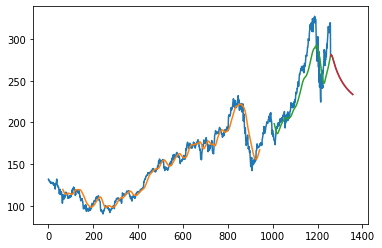

In [22]:
# shift train predictions for plotting
look_back=64
trainPredictPlot = np.empty_like(np.append(df['close'],np.array(forecast_dat).reshape(-1,),axis=0))
trainPredictPlot[:] = np.nan
trainPredictPlot = trainPredictPlot.reshape(-1,1)
trainPredictPlot[look_back:look_back+len(train_predict)] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(np.append(df['close'],np.array(forecast_dat).reshape(-1,),axis=0))
testPredictPlot[:] = np.nan
testPredictPlot = testPredictPlot.reshape(-1,1)
testPredictPlot[len(train_predict)+look_back+look_back:len(df['close'])] = test_predict

# shift new forecast for plotting
forecastPlot = np.empty_like(np.append(df['close'],np.array(forecast_dat).reshape(-1,),axis=0))
forecastPlot[:] = np.nan
forecastPlot = forecastPlot.reshape(-1,1)
forecastPlot[len(df['close']):] = np.array(forecast_dat).reshape(len(forecast_dat),1)

# plot baseline and predictions
plt.plot(np.append(df['close'].values.reshape(-1,1),scaler.inverse_transform(np.array(forecast_dat).reshape(-1,1)),axis=0))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.plot(scaler.inverse_transform(forecastPlot))
plt.show()

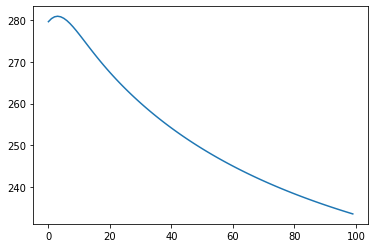

In [23]:
plt.plot(scaler.inverse_transform(forecastPlot)[len(df['close']):])